In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime
from collections import Counter

In [2]:
theme = 'WorldCup'

In [3]:
tweets = pd.read_csv(f'./data/{theme}/tweets_clean.csv')

In [4]:
tweets

,Unnamed: 0,hashtag,id,author_id,text,like_count,reply_count,retweet_count,quote_count,created_at,lang,mentions,text_clean,text_clean_list,text_clean_stopwords,hashtags_list
0,2,#Qatar2022,1592601191761838081,1591065849531604994,Massage and sex in Qatar❤️\nMassage body to bo...,0,0,0,0,2022-11-15 19:31:27+00:00,en,NaN,massage and sex in qatar massage body to body ...,"['massage', 'and', 'sex', 'in', 'qatar', 'mass...","['massage', 'sex', 'qatar', 'massage', 'body',...","['Qatar', 'Qatar2022']"
1,5,#Qatar2022,1592601156412649477,968203797049769984,How to identify a whitexican in Qatar 2022 #Q...,0,1,0,0,2022-11-15 19:31:19+00:00,en,NaN,how to identify a whitexican in qatar #qatar ...,"['how', 'to', 'identify', 'a', 'whitexican', '...","['identify', 'whitexican', 'qatar', '#qatar', ...","['Qatar2022', 'Mexico', 'WorldCup2022']"
2,7,#Qatar2022,1592601145545031681,1585336194010955781,Gillingham vs AFC Fylde\n\n⏰ 4:45:00 PM\n\nWho...,0,0,0,0,2022-11-15 19:31:16+00:00,en,NaN,gillingham vs afc fylde pm whos going to win...,"['gillingham', 'vs', 'afc', 'fylde', 'pm', 'wh...","['gillingham', 'vs', 'afc', 'fylde', 'pm', 'wh...","['FIFAWorldCup', 'Qatar2022']"
3,8,#Qatar2022,1592601145503059968,1585336194010955781,Derby vs Torquay\n\n⏰ 4:45:00 PM\n\nWho's goin...,0,0,0,0,2022-11-15 19:31:16+00:00,en,NaN,derby vs torquay pm whos going to win #fifaw...,"['derby', 'vs', 'torquay', 'pm', 'whos', 'goin...","['derby', 'vs', 'torquay', 'pm', 'whos', 'goin...","['FIFAWorldCup', 'Qatar2022']"
4,9,#Qatar2022,1592601145415008256,1585336194010955781,Cambridge United vs Curzon Ashton\n\n⏰ 4:45:00...,0,0,0,0,2022-11-15 19:31:16+00:00,en,NaN,cambridge united vs curzon ashton pm whos go...,"['cambridge', 'united', 'vs', 'curzon', 'ashto...","['cambridge', 'united', 'vs', 'curzon', 'ashto...","['FIFAWorldCup', 'Qatar2022']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129720,332573,#Qatar2022,1605037565999980545,1499701605079396353,The coronation of the true living #GOAT! @WeAr...,0,0,0,0,2022-12-20 03:09:10+00:00,en,"['2849963640', '1058376110']",the coronation of the true living #goat #dext...,"['the', 'coronation', 'of', 'the', 'true', 'li...","['coronation', 'true', 'living', '#goat', '#de...","['GOAT', 'Dextools', 'WorldCup2022', 'WorldCup..."
129721,332574,#Qatar2022,1605037409074573313,897741929387106305,Peter Drury on Argentina’s winning moment.\n\n...,3,0,0,0,2022-12-20 03:08:33+00:00,en,NaN,peter drury on argentina’s winning moment #mes...,"['peter', 'drury', 'on', 'argentina', '’', 's'...","['peter', 'drury', 'argentina', '’', 'winning'...","['Messi𓃵', 'ArgentinaVsFrance', 'Qatar2022', '..."
129722,332585,#Qatar2022,1605037015233310720,1363653333479788549,Argentine dairy industry #DitchDairy @dairy_tr...,0,0,0,0,2022-12-20 03:06:59+00:00,en,"['1370074650038910983', '1246189682150367233']",argentine dairy industry #ditchdairy #worldcup...,"['argentine', 'dairy', 'industry', '#ditchdair...","['argentine', 'dairy', 'industry', '#ditchdair...","['DitchDairy', 'WorldCupFinal', 'FIFAWorldCup'..."
129723,332586,#Qatar2022,1605036970660462602,1522221998151061509,This time @TeamMessi Argentina ⚽❤✌ \n\n 📕 #Dex...,0,0,0,0,2022-12-20 03:06:48+00:00,en,['1058376110'],this time argentina #dextools quack wool chz...,"['this', 'time', 'argentina', '#dextools', 'qu...","['time', 'argentina', '#dextools', 'quack', 'w...","['Dextools', 'WorldCup2022', 'WorldCup', 'Qata..."


In [130]:
downloaded_dates_with_occ = [datetime.strptime(str_date[:10], '%Y-%m-%d').date() for str_date in tweets.created_at]

In [131]:
Counter(downloaded_dates_with_occ)

Counter({datetime.date(2022, 11, 15): 19,
         datetime.date(2022, 11, 21): 14905,
         datetime.date(2022, 11, 23): 985,
         datetime.date(2022, 11, 24): 20184,
         datetime.date(2022, 11, 25): 6386,
         datetime.date(2022, 11, 26): 7600,
         datetime.date(2022, 11, 28): 12937,
         datetime.date(2022, 11, 27): 655,
         datetime.date(2022, 11, 30): 12560,
         datetime.date(2022, 11, 29): 5154,
         datetime.date(2022, 12, 1): 6791,
         datetime.date(2022, 12, 3): 15275,
         datetime.date(2022, 12, 2): 3300,
         datetime.date(2022, 12, 5): 4833,
         datetime.date(2022, 12, 4): 6843,
         datetime.date(2022, 12, 21): 1225,
         datetime.date(2022, 12, 20): 5622,
         datetime.date(2022, 12, 19): 2460,
         datetime.date(2022, 12, 18): 1991})

In [115]:
downloaded_dates = [datetime(2022, 11, 15).date(),
        datetime(2022, 11, 21).date(),
        datetime(2022, 11, 23).date(),
        datetime(2022, 11, 24).date(),
         datetime(2022, 11, 25).date(),
         datetime(2022, 11, 26).date(),
         datetime(2022, 11, 27).date(),
         datetime(2022, 11, 28).date(),
         datetime(2022, 11, 29).date(),
         datetime(2022, 11, 30).date(),
         datetime(2022, 12, 1).date(),
         datetime(2022, 12, 2).date(),
         datetime(2022, 12, 3).date(),
         datetime(2022, 12, 4).date(),
         datetime(2022, 12, 5).date(),
         datetime(2022, 12, 18).date(),
         datetime(2022, 12, 19).date(),
         datetime(2022, 12, 20).date(),
         datetime(2022, 12, 21).date()
    ]

In [5]:
tweets.created_at.iloc[0]

'2022-11-15 19:31:27+00:00'

In [41]:
def list_capture(input_str: str):
    input_str = input_str[1:-1]
    just_commas = re.sub('\'', '', input_str)
    # removing spaces
    no_spaces = re.sub(' ', '', just_commas)
    
    str_list = no_spaces.split(',')
    
    output_list = []
    for ele in str_list:
        output_list.append(str(ele))

    return output_list

In [43]:
list_capture(tweets.hashtags_list.iloc[0])

['Qatar', 'Qatar2022']

In [18]:
queries = ['#QatarWorldCup2022', '#Qatar2022', '#FIFAWorldCup']

In [44]:
all_hastags = []

for hashtags in tweets.hashtags_list:
    hashtags = list_capture(hashtags)
    
    all_hastags.extend(hashtags)

In [46]:
hashtags_occurences = dict(Counter(all_hastags))

In [54]:
most_popular_hashtags = list(dict(sorted(hashtags_occurences.items(), key=lambda item: item[1])).keys())[-40:]

In [55]:
most_popular_hashtags

['England',
 'OpIran',
 'TUNFRA',
 'NEDUSA',
 'IranRevolution',
 'QatarWorldCup',
 'SayTheirNames',
 'Netherlands',
 'Messi𓃵',
 'qatar2022',
 'PortugalvsUruguay',
 'FIFA',
 'Messi',
 'Cameroon',
 'KOR',
 'football',
 'WorldcupQatar2022',
 'UtilityCoin',
 'Betbuy',
 'BetBot',
 'WORLDCUP',
 'MahsaAmini',
 'Argentina',
 'URU',
 'Serbia',
 'URUSOU',
 'USA',
 'Brazil',
 'Portugal',
 'SouthKorea',
 'Qatar',
 'Dreamers2022',
 'FIFAWorldCupQatar2022',
 'Uruguay',
 'WorldCup',
 'FIFAWorldCup2022',
 'WorldCup2022',
 'Qatar2022',
 'FIFAWorldCup',
 'QatarWorldCup2022']

In [112]:
def get_dates_of_hashtag(hashtag: str):
    date_and_occurences = {}

    for _, row in tweets.iterrows():
        if hashtag in list_capture(row.hashtags_list):
            date = datetime.strptime(row.created_at[:10], '%Y-%m-%d').date()

            if date in date_and_occurences.keys():
                date_and_occurences[date] += 1   
            else:
                date_and_occurences[date] = 1
                
    return date_and_occurences

In [113]:
mahsa = get_dates_of_hashtag('MahsaAmini')

In [114]:
mahsa

{datetime.date(2022, 11, 21): 2310,
 datetime.date(2022, 11, 23): 4,
 datetime.date(2022, 11, 24): 11,
 datetime.date(2022, 11, 25): 68,
 datetime.date(2022, 11, 26): 339,
 datetime.date(2022, 11, 28): 49,
 datetime.date(2022, 11, 27): 5,
 datetime.date(2022, 11, 30): 325,
 datetime.date(2022, 11, 29): 136,
 datetime.date(2022, 12, 1): 88,
 datetime.date(2022, 12, 3): 12,
 datetime.date(2022, 12, 2): 1,
 datetime.date(2022, 12, 5): 12,
 datetime.date(2022, 12, 4): 7,
 datetime.date(2022, 12, 19): 1,
 datetime.date(2022, 12, 18): 1,
 datetime.date(2022, 12, 21): 1}

In [64]:
dict(sorted(mahsa.items(), key=lambda item: item[1])).keys()

dict_keys([datetime.date(2022, 12, 2), datetime.date(2022, 12, 19), datetime.date(2022, 12, 18), datetime.date(2022, 12, 21), datetime.date(2022, 11, 23), datetime.date(2022, 11, 27), datetime.date(2022, 12, 4), datetime.date(2022, 11, 24), datetime.date(2022, 12, 3), datetime.date(2022, 12, 5), datetime.date(2022, 11, 28), datetime.date(2022, 11, 25), datetime.date(2022, 12, 1), datetime.date(2022, 11, 29), datetime.date(2022, 11, 30), datetime.date(2022, 11, 26), datetime.date(2022, 11, 21)])

In [137]:
def occurences_in_date_dict(date_dict):
    y = []
    
    for date in downloaded_dates:
        if date in date_dict.keys():
            y.append(date_dict[date])
        else:
            y.append(0)
            
    return y

In [125]:
y = occurences_in_date_dict(mahsa)

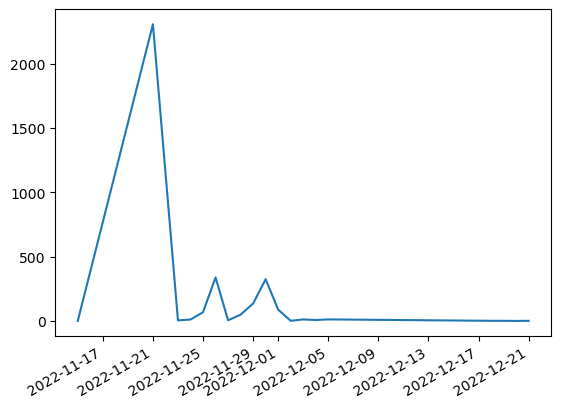

In [126]:
plt.plot(downloaded_dates, y)
plt.gcf().autofmt_xdate()

In [144]:
uru = get_dates_of_hashtag('Argentina')

In [145]:
y = occurences_in_date_dict(uru)

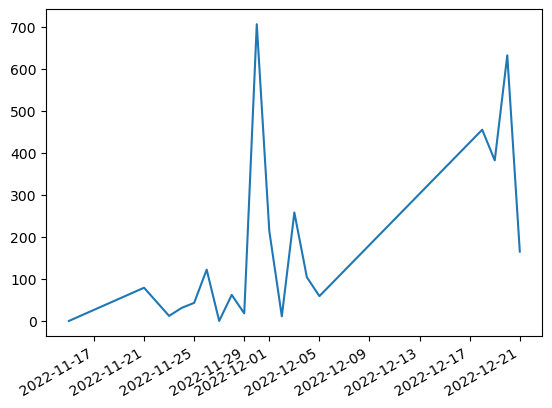

In [146]:
plt.plot(downloaded_dates, y)
plt.gcf().autofmt_xdate()